In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import rcParams
import matplotlib.ticker as ticker

/home/kelidan/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/kelidan/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [ ]:
PATH = '/home/kelidan/VVIRAL/data/SEC'

In [4]:
AAV2_yields = pd.read_csv(f'{PATH}/AAV2/yields.csv', usecols=[0,1,2])
AAV2_purities = pd.read_csv(f'{PATH}/AAV2/purities.csv', usecols=[0,1,2])

AAV2_yields_multi = pd.read_csv(f'{PATH}/AAV2/yields.csv', usecols=[3])
AAV2_purities_multi = pd.read_csv(f'{PATH}/AAV2/purities.csv', usecols=[3])

# AAV5_yields = pd.read_csv(f'{PATH}/AAV5/yields.csv')
# AAV5_purities = pd.read_csv(f'{PATH}/AAV5/purities.csv')

AAV9_yields = pd.read_csv(f'{PATH}/AAV9/yields.csv')
AAV9_purities = pd.read_csv(f'{PATH}/AAV9/purities.csv')

In [5]:
# purities = purities.apply(lambda x: x * 100)
AAV2_yields = AAV2_yields.apply(lambda x: x / 100)
AAV2_yields_multi = AAV2_yields_multi.apply(lambda x: x / 100)
AAV9_yields = AAV9_yields.apply(lambda x: x / 100)

In [20]:
def plot_data(ax, yields, purities, title, alpha=1):
    batch_colors = {'Batch 1': '#ff8533', 'Batch 2': '#59d977', 'Batch 3': '#ff6b66'}
    batch_names = list(batch_colors.keys())
    centroids = {}
    # Plot each batch's points
    for i, values in enumerate(zip(yields.values.T, purities.values.T)):
        batch = batch_names[i]
        yld = values[0]
        pur = values[1]
        ax.scatter(yld, pur, label=batch, s=100, color=batch_colors[batch], alpha=alpha)
        # Calculate centroids
        centroid_yld = np.mean(yld)
        centroid_pur = np.mean(pur)
        centroids[batch] = (centroid_yld, centroid_pur)
        # Plot centroids
        ax.scatter(centroid_yld, centroid_pur, color=batch_colors[batch],
                    edgecolor='black', s=100, marker='*', alpha=alpha)
    
    
    # Draw arrows connecting the centroids in the order of batches
    ordered_batches = sorted(centroids.keys())  # assuming batch names order correctly
    for i in range(len(ordered_batches)-1):
        start = centroids[ordered_batches[i]]
        end = centroids[ordered_batches[i+1]]
        ax.annotate("",
                    xy=end, xycoords='data',
                    xytext=start, textcoords='data',
                    arrowprops=dict(arrowstyle="->", lw=alpha, color='black'))
    ax.set_title(f"{title}", x=0.5, y=1, fontsize=15, fontweight='bold')
    ax.set_xlabel('Yield',fontweight='bold', fontsize=12)
    ax.set_ylabel('Purity',fontweight='bold', fontsize=12)
    ax.legend(loc='lower right')
    ax.grid(True)


def format_zero(x, pos):
    return '0' if abs(x) < 1e-9 else f'{x:.2f}'

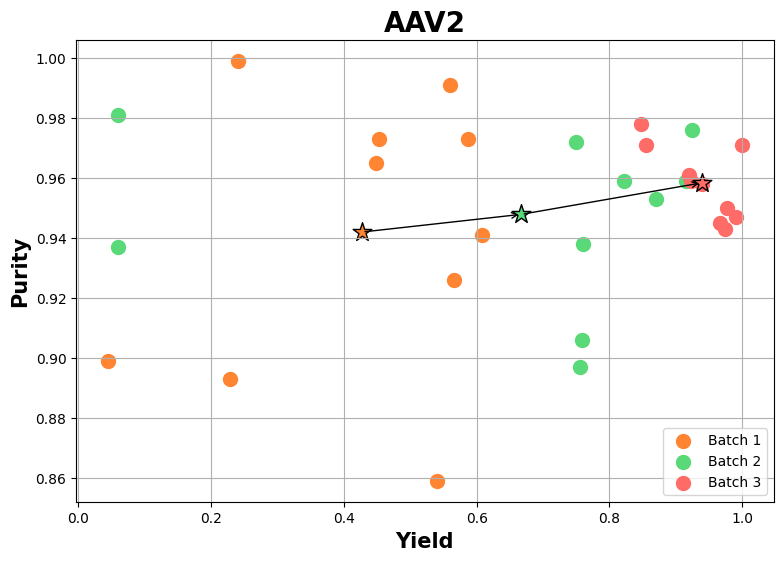

In [61]:
# fontsize=20
# fontsize=15
# S=100

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot()
plot_data(ax, AAV2_yields, AAV2_purities, title="AAV2")
fig.savefig('AAV2_yields_vs_purities_cluster.png', dpi=600, transparent=True, bbox_inches='tight')

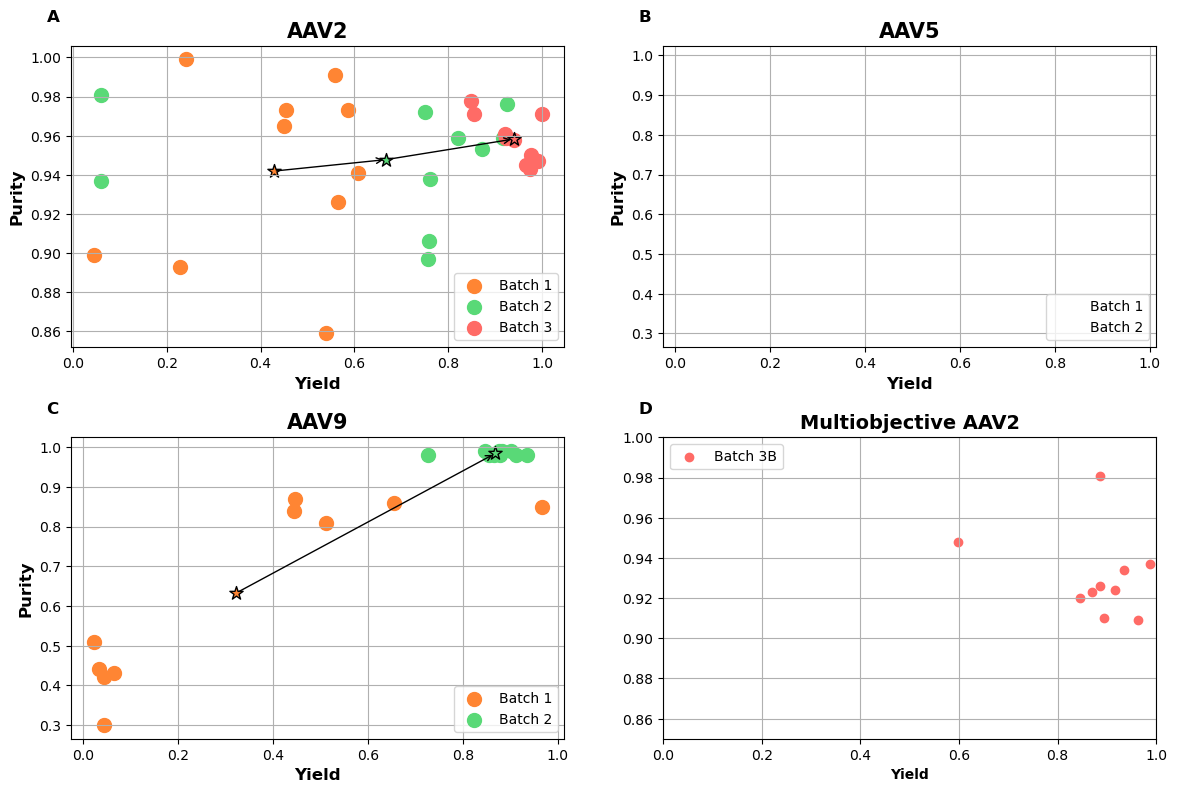

In [22]:

fig = plt.figure(figsize=(14, 9))
outer_gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1],hspace=0.3)

# Top Row
gs_top = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=outer_gs[0, 0])


# Left subplot in the top row
gs_top_left = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs_top[0, 0])
ax11 = fig.add_subplot(gs_top_left[0, :])
ax11.axis('off')
ax_top_left = fig.add_subplot(gs_top_left[0, 0])
plot_data(ax_top_left, AAV2_yields, AAV2_purities, title="AAV2")

# Right subplot in the top row
gs_top_right = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs_top[0, 1])
ax12 = fig.add_subplot(gs_top_right[0, :])
ax12.axis('off')
ax_top_right = fig.add_subplot(gs_top_right[0, 0])
plot_data(ax_top_right, AAV9_yields, AAV9_purities, title="AAV5", alpha=0)


# Bottom Row
gs_bottom = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=outer_gs[1, 0])

# Set left subplot in the bottom row
gs_bottom_left = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs_bottom[0, 0:1])
ax211 = fig.add_subplot(gs_bottom_left[0, :])
ax211.axis('off')
ax_bottom_left_211 = fig.add_subplot(gs_bottom_left[0, 0])
plot_data(ax_bottom_left_211, AAV9_yields, AAV9_purities, title="AAV9")

# Set mid subplot in the bottom row - Planned AAV6
# gs_bottom_mid = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs_bottom[0 ,1])
# ax212 = fig.add_subplot(gs_bottom_mid[0, :])
# ax212.axis('off')
# ax_bottom_mid_212 = fig.add_subplot(gs_bottom_mid[0, 0])
# plot_data(ax_bottom_mid_212, AAV9_yields, AAV9_purities, title="AAV6", alpha=0)

gs_bottom_right =  gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs_bottom[0, 1])
ax222 = fig.add_subplot(gs_bottom_right[0, :])
ax222.set_title('Multiobjective AAV2', x=0.5, y=1, fontsize=14, fontweight='bold')
ax222.axis('off')
ax_bottom_right_222 = fig.add_subplot(gs_bottom_right[0, :])
ax_bottom_right_222.scatter(AAV2_yields_multi, AAV2_purities_multi, label="Batch 3B", color="#ff6b66")
ax_bottom_right_222.grid(True)
ax_bottom_right_222.set_xlabel('Yield',fontweight='bold')
ax_bottom_right_222.legend(loc='upper left')
ax_bottom_right_222.set_xlim(0, 1)
ax_bottom_right_222.set_ylim(0.85, 1)


axes = [ax11, ax12, ax211, ax222]
letters = ['A', 'B', 'C', 'D']
for i in range(4):
    axes[i].text(-0.05, 1.08, letters[i], transform=axes[i].transAxes,
            fontsize=12, fontweight='bold')
fig.savefig('yields_vs_purities_all_cluster-v2.png', dpi=600, transparent=True, bbox_inches='tight')